In [14]:
import os
import json

import numpy as np

In [15]:
data_path = "../../data/results/zero-shot/5x5-relation-with-errors/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_total_zero_shot = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity_zero_shot = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_zero_shot = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

errors_zero_shot = np.sum([d["errors"] for d in data])

errors_zero_shot

4858

In [16]:
data_path = "../../data/results/one-shot/5x5-relation-with-errors/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_total_one_shot = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity_one_shot = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_one_shot = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

errors_one_shot = np.sum([d["errors"] for d in data])

errors_one_shot

302

In [17]:
data_path = "../../data/results/two-shot/5x5-relation-with-errors/"

data = []
for parent_folder in os.listdir(f"./{data_path}"):
    for child_folder in os.listdir(f"./{data_path}/{parent_folder}"):
        for file_name in os.listdir(f"./{data_path}/{parent_folder}/{child_folder}"):
            filepath = os.path.join(f"./{data_path}/{parent_folder}/{child_folder}", file_name)
            with open(filepath, "r") as file:
                json_data = json.load(file)
                data.append(json_data)

f1_scores_total_two_shot = [d["metrics"]["overall_metrics"]["f1_score"] for d in data]
f1_scores_entity_two_shot = [d["metrics"]["entity_metrics"]["overall"]["f1_score"] for d in data]
f1_scores_relation_two_shot = [d["metrics"]["relation_metrics"]["overall"]["f1_score"] for d in data]

errors_two_shot = np.sum([d["errors"] for d in data])
errors_two_shot

125

In [18]:
np.mean(f1_scores_total_zero_shot)

0.035688888888888895

In [19]:
np.mean(f1_scores_entity_zero_shot)

0.06386666666666667

In [20]:
np.mean(f1_scores_relation_zero_shot)

0.0032444444444444443

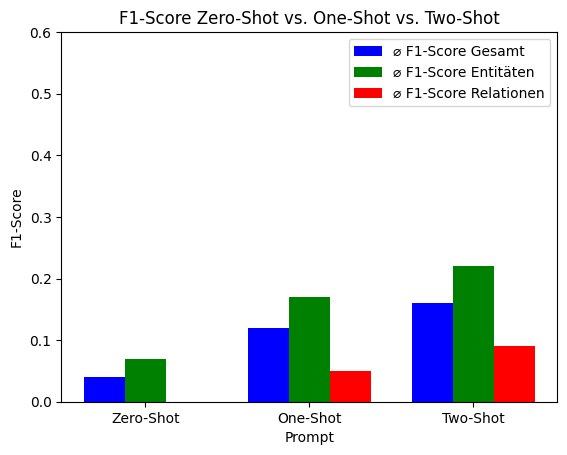

In [28]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Zero-Shot', 'One-Shot', 'Two-Shot']

values1 = [0.04, 0.12, 0.16]
values2 = [0.07, 0.17, 0.22]
values3 = [0.00, 0.05, 0.09]

bar_width = 0.25

r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, values1, color='b', width=bar_width, label='⌀ F1-Score Gesamt')
plt.bar(r2, values2, color='g', width=bar_width, label='⌀ F1-Score Entitäten')
plt.bar(r3, values3, color='r', width=bar_width, label='⌀ F1-Score Relationen')

plt.xlabel('Prompt')
plt.xticks([r + bar_width for r in range(len(categories))], categories)

plt.ylim((0, 0.6))

plt.ylabel('F1-Score')
plt.title('F1-Score Zero-Shot vs. One-Shot vs. Two-Shot')

plt.legend()

plt.savefig("./images/vergleich_zero_shot_one_shot_two_shot.png", dpi=700)

plt.show()


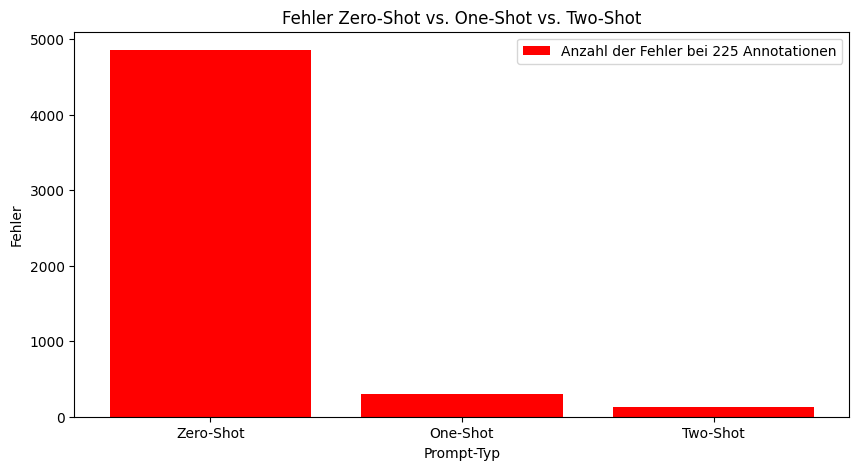

In [32]:
values = [errors_zero_shot, errors_one_shot, errors_two_shot]

plt.figure(figsize=(10, 5))

plt.bar(categories, values, color="r", label='Anzahl der Fehler bei 225 Annotationen')

plt.xlabel('Prompt-Typ')
plt.ylabel('Fehler')
plt.title('Fehler Zero-Shot vs. One-Shot vs. Two-Shot')

plt.legend()

plt.savefig("./images/vergleich_zero_shot_one_shot_two_shot_fehler.png", dpi=700)

plt.show()